In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
df = pd.read_csv("Amazon Sales data.csv")

# Display the first few rows to understand the structure
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create new columns for Month and Year
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_16812\458091266.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    object        
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
 14  Month           100 non-null    int32         
 15  Year   

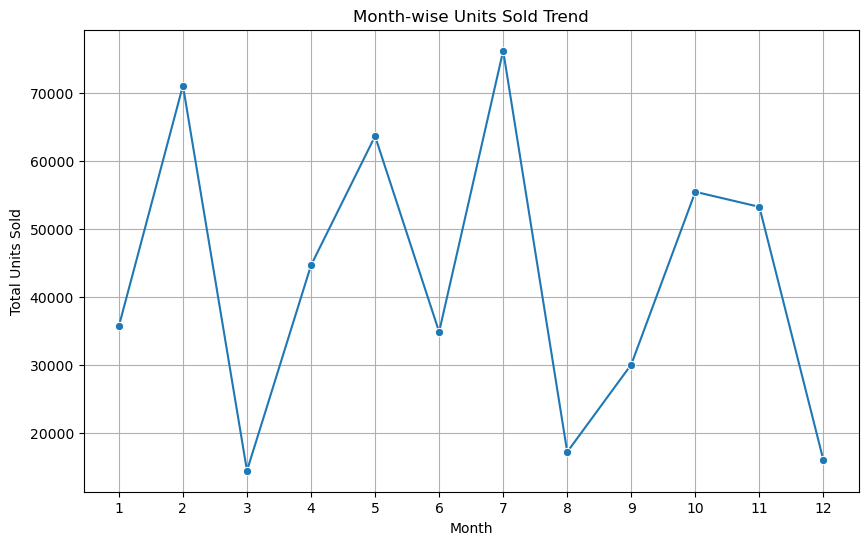

In [9]:
# Group units sold data by month
month_units = df.groupby('Month')['Units Sold'].sum()

# Visualize month-wise units sold trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_units, marker='o')
plt.title('Month-wise Units Sold Trend')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(range(1, 13))  # Ensure months are displayed from 1 to 12
plt.grid()
plt.show()


C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_16812\416295266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_units.index, y=year_units.values, palette="Blues_d")


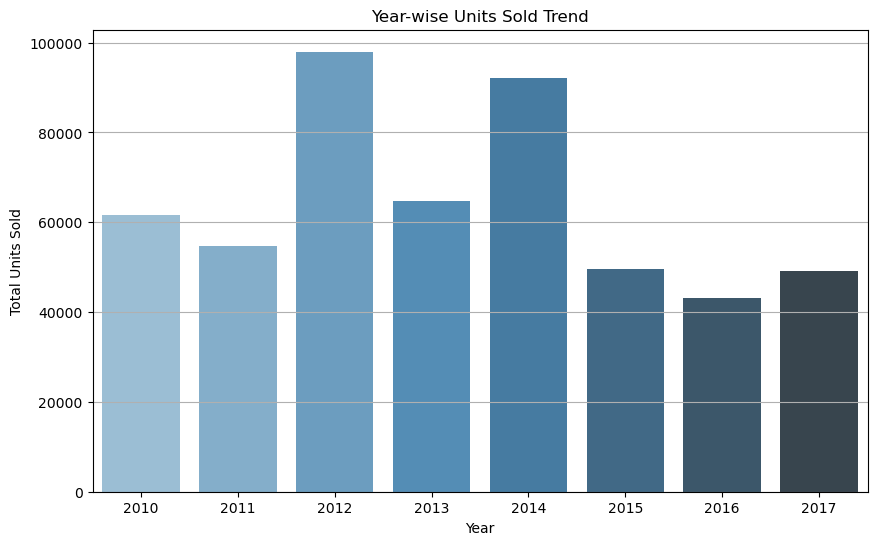

In [10]:
# Group units sold data by year
year_units = df.groupby('Year')['Units Sold'].sum()

# Visualize yearly units sold trend
plt.figure(figsize=(10, 6))
sns.barplot(x=year_units.index, y=year_units.values, palette="Blues_d")
plt.title('Year-wise Units Sold Trend')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid(axis='y')
plt.show()


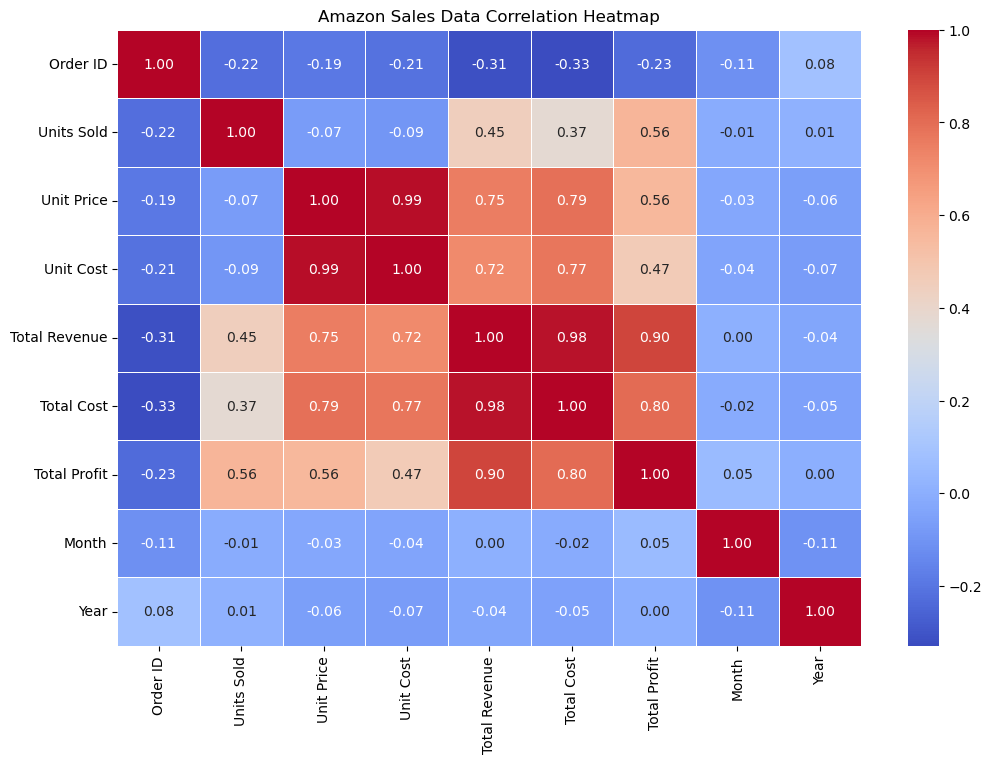

In [16]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric data
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Adjusted size for better visualization
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Amazon Sales Data Correlation Heatmap')
plt.show()



In [24]:
# Total Units Sold
total_units_sold = df['Units Sold'].sum()

# Total Profit
total_profit = df['Total Profit'].sum()

# Average Units Sold per Order
unique_orders = df['Order ID'].nunique()
average_units_per_order = total_units_sold / unique_orders

print(f"Total Units Sold: {total_units_sold:,}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Units Sold per Order: {average_units_per_order:,.2f}")


Total Units Sold: 512,871
Total Profit: $44,168,198.40
Average Units Sold per Order: 5,128.71


C:\Users\samyukthaelanchezhia\AppData\Local\Temp\ipykernel_16812\2698058978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_type_units_sold.values, y=item_type_units_sold.index, palette="viridis")


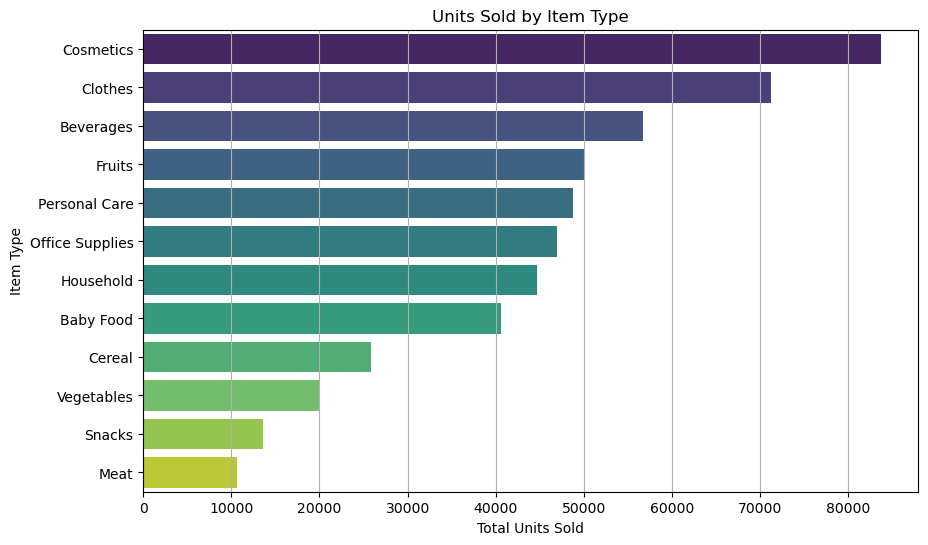

In [30]:
# Group by Item Type and sum Units Sold
item_type_units_sold = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False)

# Visualize item type-wise units sold
plt.figure(figsize=(10, 6))
sns.barplot(x=item_type_units_sold.values, y=item_type_units_sold.index, palette="viridis")
plt.title('Units Sold by Item Type')
plt.xlabel('Total Units Sold')
plt.ylabel('Item Type')
plt.grid(axis='x')
plt.show()



In [32]:
df.to_csv("cleaned_amazon_sales.csv", index=False)
print("Cleaned dataset saved as 'cleaned_amazon_sales.csv'")

Cleaned dataset saved as 'cleaned_amazon_sales.csv'
